In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")    

In [2]:
train_df = pd.read_csv('voice_train.csv')
test_df = pd.read_csv('voice_test.csv')

In [3]:
train_df.head()

Id  meanfreq        sd    median       Q25       Q75       IQR      skew  \
0   765  0.162337  0.058206  0.174065  0.100225  0.196512  0.096287  2.127226   
1  3071  0.161653  0.057435  0.170138  0.157522  0.182929  0.025407  6.968850   
2  1546  0.165290  0.061891  0.135071  0.118468  0.225176  0.106708  2.631865   
3   410  0.188100  0.055735  0.206028  0.130493  0.229470  0.098977  1.538406   
4  2689  0.187497  0.044226  0.190071  0.156800  0.215435  0.058635  1.653083   

        kurt    sp.ent  ...  centroid   meanfun    minfun    maxfun   meandom  \
0   7.815129  0.921533  ...  0.162337  0.095852  0.016754  0.235294  0.406033   
1  60.968047  0.870409  ...  0.161653  0.163486  0.015601  0.204082  0.595161   
2  12.629116  0.918897  ...  0.165290  0.120050  0.035088  0.222222  0.458577   
3   5.145753  0.914325  ...  0.188100  0.108470  0.021305  0.145455  0.493229   
4   5.839465  0.907477  ...  0.187497  0.154529  0.048338  0.279070  1.113502   

     mindom    maxdom   dfrange   modindx   label  
0  0.046875  3.484375  3.437500  0.155348    male  
1  0.170898  3.979492  3.808594  0.209073  female  
2  0.087891  1.015625  0.927734  0.459834    male  
3  0.125000  4.734375  4.609375  0.105202    male  
4  0.023438  8.765625  8.742188  0.103095  female  

[5 rows x 22 columns]

**Data Description, Information and checking for Outliers:**

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2851 entries, 0 to 2850
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Id        2851 non-null   int64  
 1   meanfreq  2851 non-null   float64
 2   sd        2851 non-null   float64
 3   median    2851 non-null   float64
 4   Q25       2851 non-null   float64
 5   Q75       2851 non-null   float64
 6   IQR       2851 non-null   float64
 7   skew      2851 non-null   float64
 8   kurt      2851 non-null   float64
 9   sp.ent    2851 non-null   float64
 10  sfm       2851 non-null   float64
 11  mode      2851 non-null   float64
 12  centroid  2851 non-null   float64
 13  meanfun   2851 non-null   float64
 14  minfun    2851 non-null   float64
 15  maxfun    2851 non-null   float64
 16  meandom   2851 non-null   float64
 17  mindom    2851 non-null   float64
 18  maxdom    2851 non-null   float64
 19  dfrange   2851 non-null   float64
 20  modindx   2851 non-null   floa

In [5]:
train_df.describe()

Id     meanfreq           sd       median          Q25  \
count  2851.000000  2851.000000  2851.000000  2851.000000  2851.000000   
mean   1591.565416     0.180923     0.057143     0.185722     0.140349   
std     909.939169     0.029796     0.016588     0.036175     0.048628   
min       1.000000     0.039363     0.018363     0.010975     0.000229   
25%     808.500000     0.163739     0.042082     0.169726     0.111139   
50%    1590.000000     0.184848     0.059151     0.190067     0.140229   
75%    2382.500000     0.199061     0.066891     0.210650     0.175690   
max    3167.000000     0.251124     0.115273     0.261224     0.247347   

               Q75          IQR         skew         kurt       sp.ent  ...  \
count  2851.000000  2851.000000  2851.000000  2851.000000  2851.000000  ...   
mean      0.224730     0.084381     3.118469    35.808329     0.895312  ...   
std       0.023509     0.042728     4.163727   131.430900     0.044795  ...   
min       0.042946     0.014558     0.141735     2.068455     0.738651  ...   
25%       0.208756     0.042663     1.638410     5.604497     0.862190  ...   
50%       0.225729     0.094235     2.183320     8.255809     0.901840  ...   
75%       0.243700     0.114208     2.932962    13.649354     0.928727  ...   
max       0.273469     0.252225    34.725453  1309.612887     0.981997  ...   

              mode     centroid      meanfun       minfun       maxfun  \
count  2851.000000  2851.000000  2851.000000  2851.000000  2851.000000   
mean      0.165481     0.180923     0.142891     0.036834     0.258968   
std       0.076918     0.029796     0.032191     0.019182     0.029806   
min       0.000000     0.039363     0.055565     0.009775     0.108696   
25%       0.118100     0.163739     0.117578     0.018223     0.253968   
50%       0.186667     0.184848     0.140678     0.046921     0.271186   
75%       0.221341     0.199061     0.169593     0.047904     0.277457   
max       0.280000     0.251124     0.237636     0.204082     0.279114   

           meandom       mindom       maxdom      dfrange      modindx  
count  2851.000000  2851.000000  2851.000000  2851.000000  2851.000000  
mean      0.833608     0.052634     5.075745     5.023111     0.173933  
std       0.525565     0.062982     3.526201     3.525193     0.119463  
min       0.007812     0.004883     0.007812     0.000000     0.000000  
25%       0.423799     0.007812     2.207031     2.183594     0.099591  
50%       0.767578     0.023438     4.992188     4.968750     0.139159  
75%       1.180411     0.070312     7.078125     7.042969     0.209525  
max       2.957682     0.458984    21.867188    21.843750     0.932374  

[8 rows x 21 columns]

In [6]:
train_df.skew()

Id         -0.001228
meanfreq   -0.608137
sd          0.145654
median     -1.015778
Q25        -0.495925
Q75        -0.821695
IQR         0.299418
skew        4.946760
kurt        5.881449
sp.ent     -0.429966
sfm         0.350951
mode       -0.839555
centroid   -0.608137
meanfun     0.032909
minfun      1.916373
maxfun     -2.215242
meandom     0.610751
mindom      1.683842
maxdom      0.738665
dfrange     0.740749
modindx     2.075593
dtype: float64

<AxesSubplot:xlabel='kurt', ylabel='Density'>

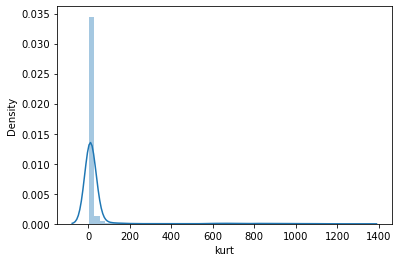

In [7]:
sns.distplot(train_df['kurt'])

# EDA :

In [9]:
train_df['label'].value_counts()

female    1432
male      1419
Name: label, dtype: int64

Text(0.5, 1.0, 'Frequency Distribution')

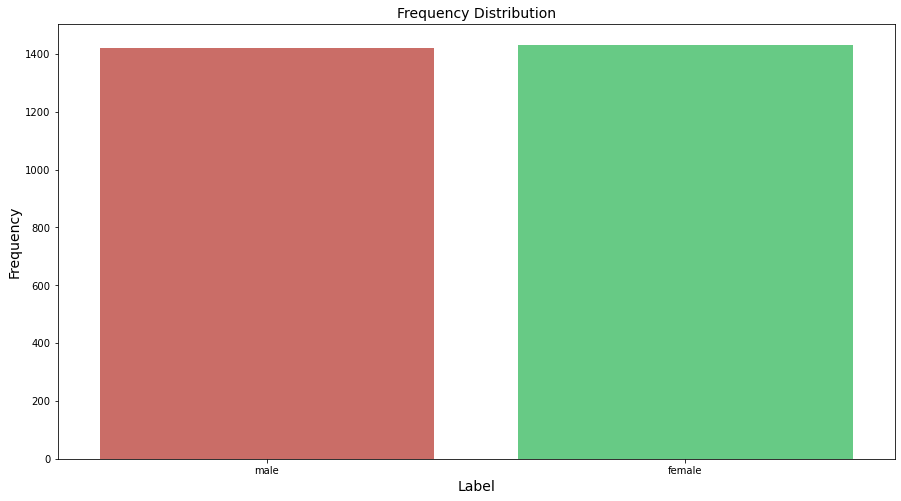

In [11]:
fig = plt.figure(figsize = [15, 8])

sns.countplot(x = 'label', data = train_df, palette = ['#DB5E56','#56DB7F'])
plt.xlabel(xlabel = 'Label', size = 14)
plt.ylabel(ylabel = 'Frequency', size = 14)
plt.title(label = 'Frequency Distribution', size = 14)

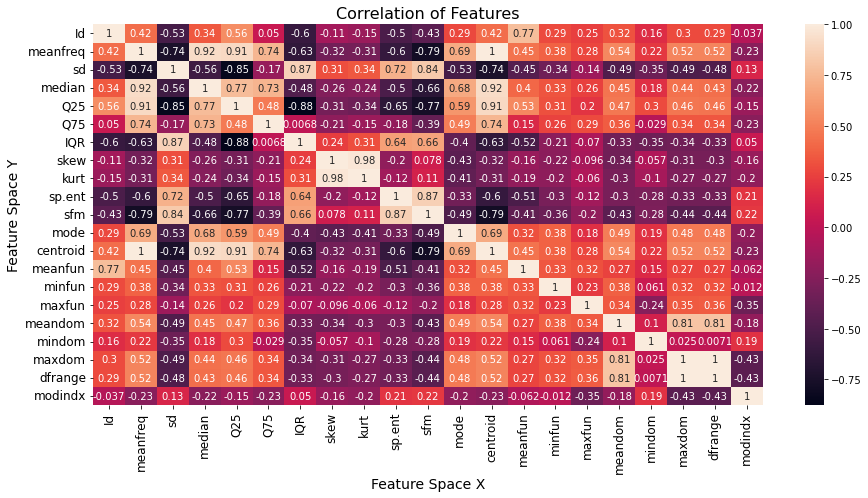

In [13]:
figure = plt.figure(figsize=[15, 7])
sns.heatmap(data=train_df.corr(), annot=True)
plt.xticks(size=12, rotation=90)
plt.yticks(size=12)
plt.xlabel(xlabel='Feature Space X', size=14)
plt.ylabel(ylabel='Feature Space Y', size=14)
plt.title(label='Correlation of Features', size=16)
plt.show()


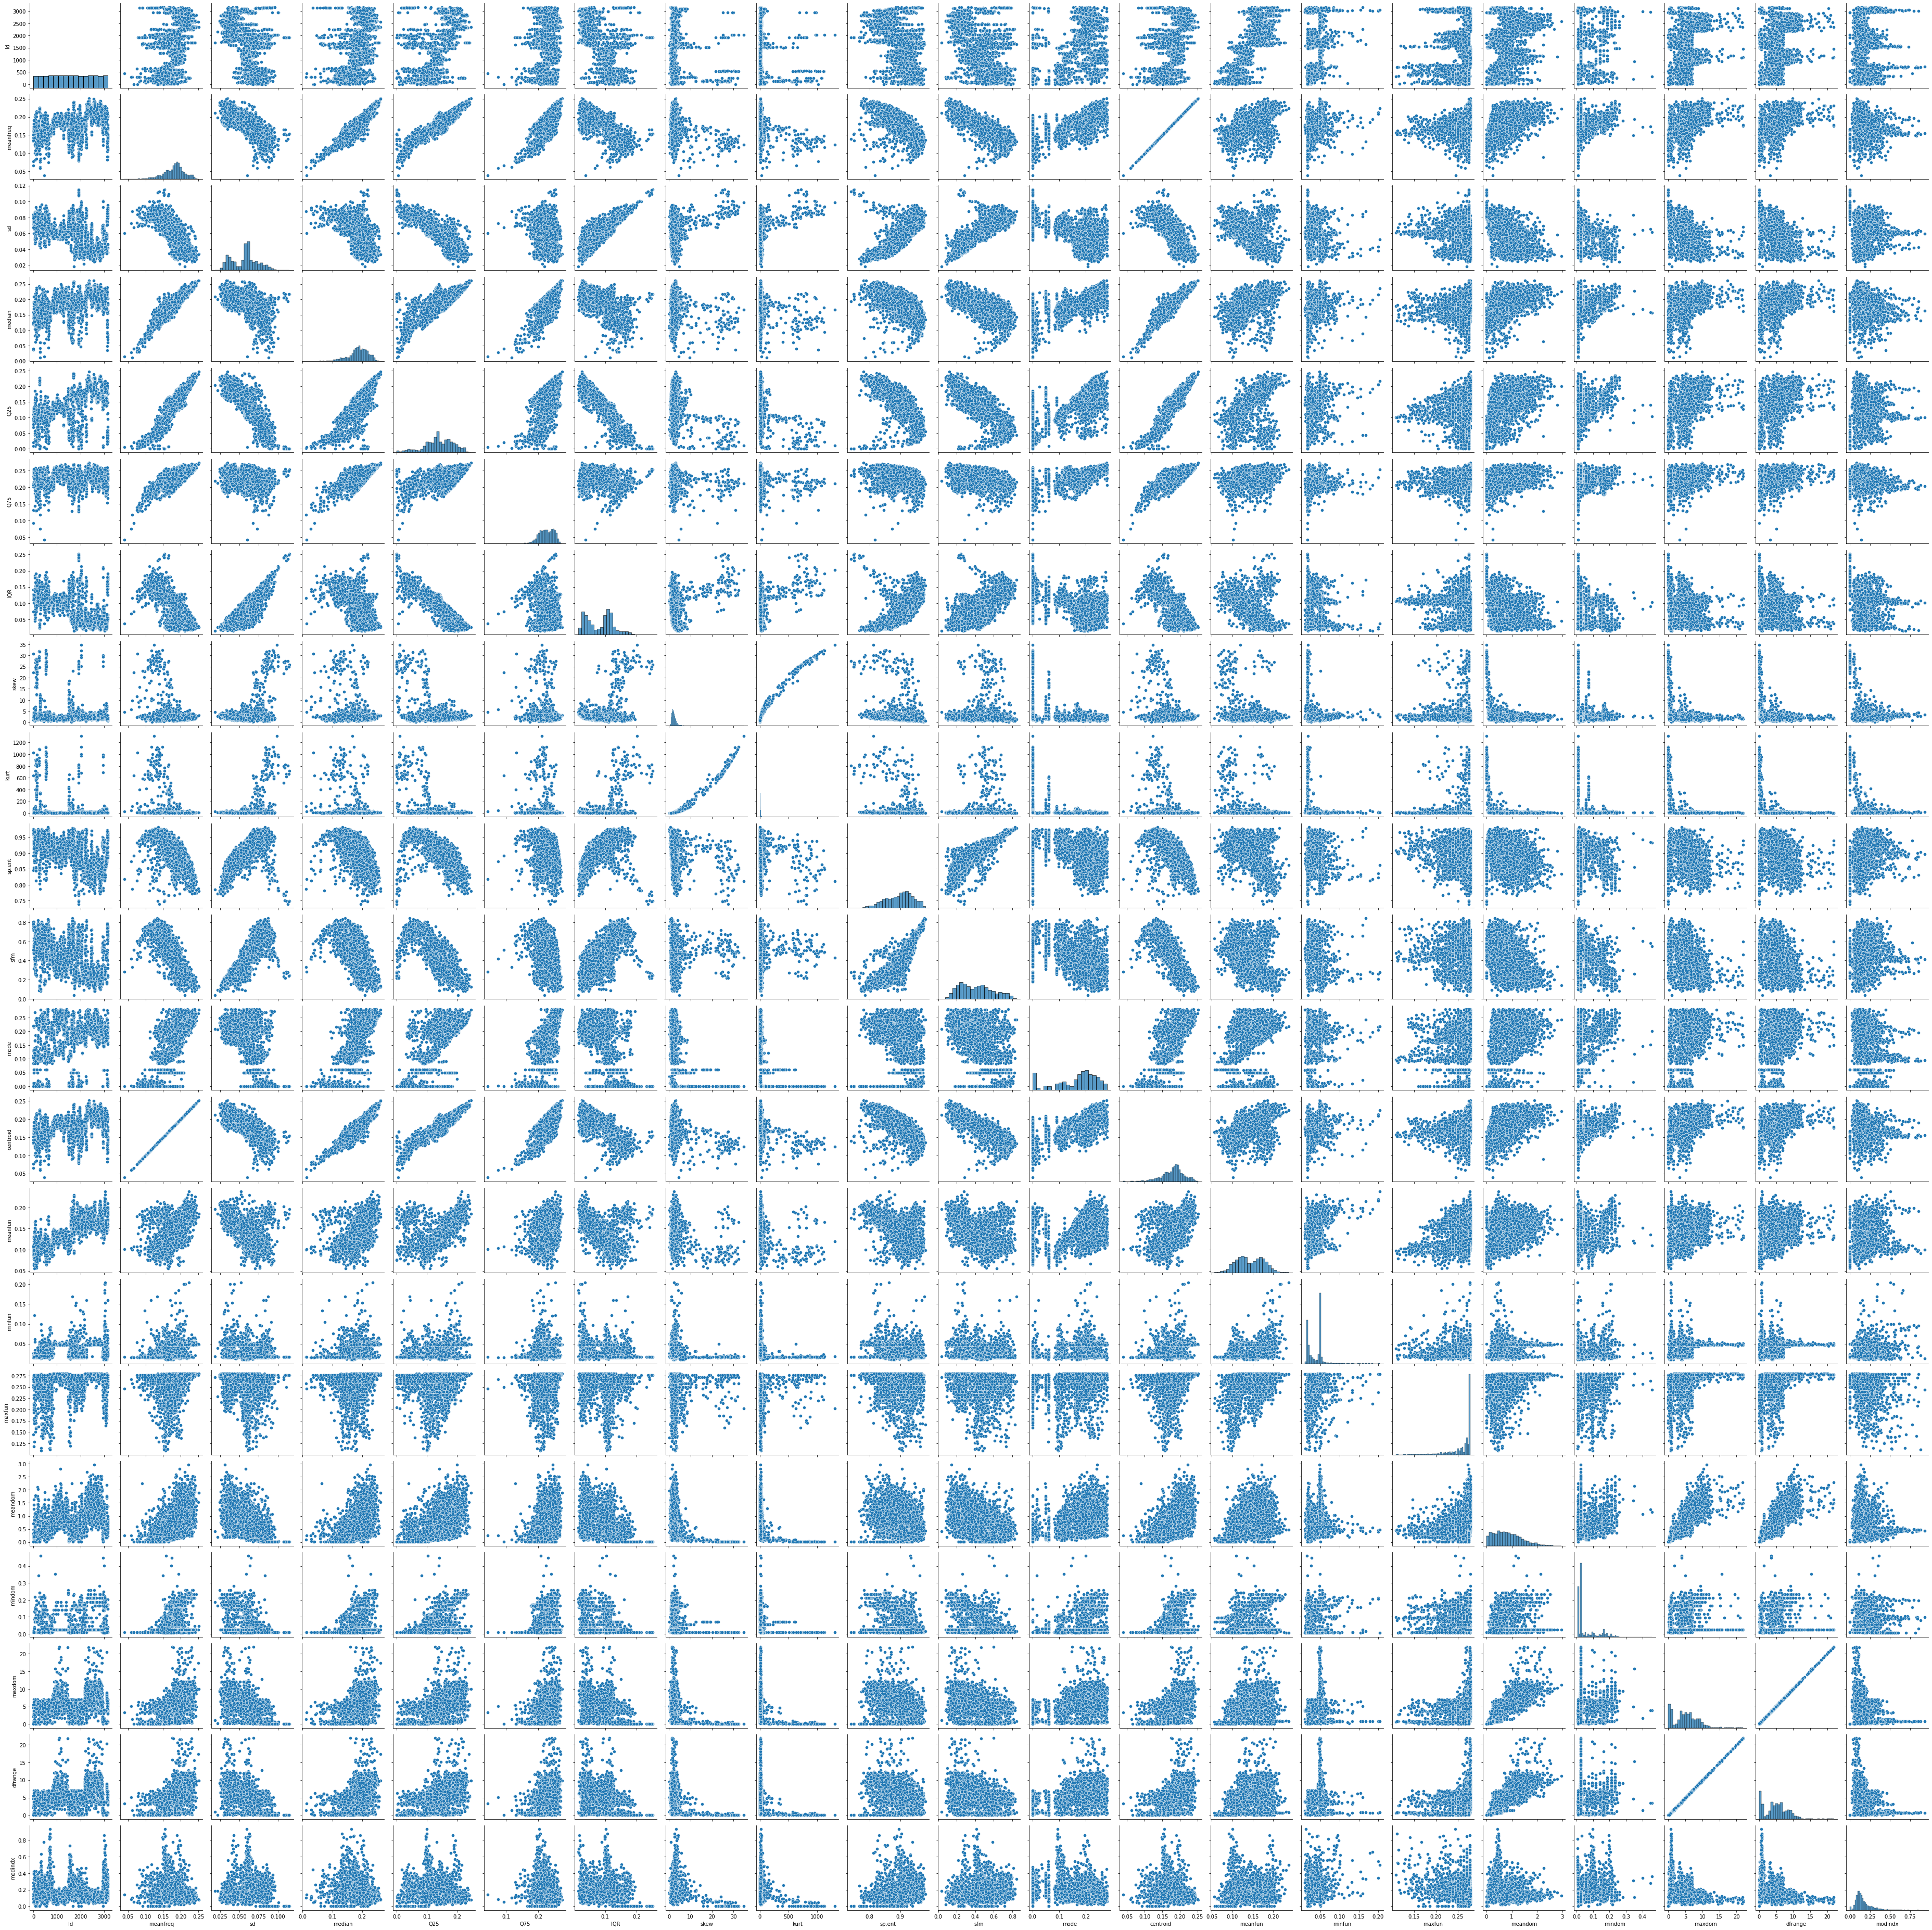

In [14]:
sns.pairplot(train_df)

**Using LabelEncoder for Categorical Variables:**

In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
le = LabelEncoder()

In [17]:
train_df['label'] = le.fit_transform(train_df['label'])

In [101]:
train_df['label'].value_counts()

0    1432
1    1419
Name: label, dtype: int64

**Train-Test Split:**

In [20]:
x = train_df.iloc[:, 1:21]
y = train_df['label']

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

# Model Development & Evalutaion:

**Baseline Model Development & Evaluation:**

# 1. Decision tree:

In [25]:
from sklearn.tree import DecisionTreeClassifier

In [31]:
dtree = DecisionTreeClassifier(max_depth = 2, min_samples_split = 2, random_state = 0)

In [32]:
dtree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=0)

In [33]:
preds_train = dtree.predict(x_train)
preds_test = dtree.predict(x_test)

**Model Evalutaion:**

In [34]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [51]:
from sklearn.metrics import plot_confusion_matrix  

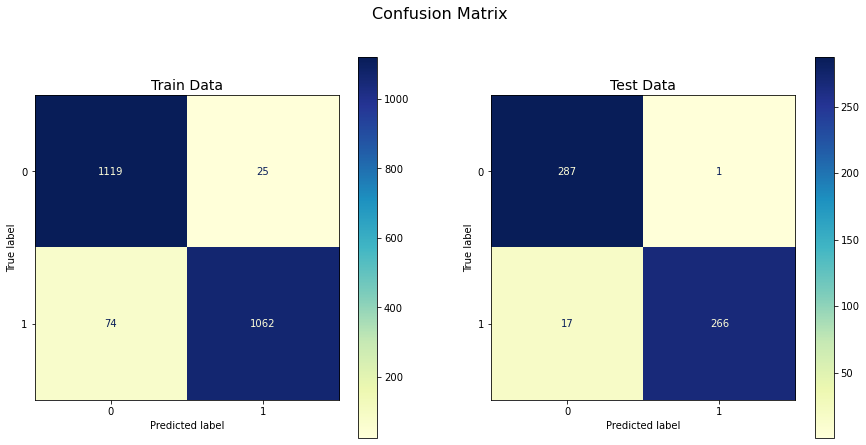

In [54]:
# Plotting confusion maxtrix of train and test data
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharex=False, figsize=(15, 7))
plot_confusion_matrix(estimator=dtree, X=x_train, y_true=y_train, values_format='.5g', cmap='YlGnBu', ax=ax1)
plot_confusion_matrix(estimator=dtree, X=x_test, y_true=y_test, values_format='.5g', cmap='YlGnBu', ax=ax2)
ax1.set_title(label='Train Data', size=14)
ax2.set_title(label='Test Data', size=14)
ax1.grid(b=False)
ax2.grid(b=False)
plt.suptitle(t='Confusion Matrix', size=16)
plt.show()

In [55]:
def model_eval(actual, predicted):
    accuracy = accuracy_score(actual, predicted)
    class_rep = classification_report(actual, predicted)
    print('The accuracy of the Model is :', accuracy)
    print(class_rep)

In [57]:
print('                    Training Report           ')
model_eval(preds_train, y_train)

                    Training Report           
The accuracy of the Model is : 0.9565789473684211
              precision    recall  f1-score   support

           0       0.98      0.94      0.96      1193
           1       0.93      0.98      0.96      1087

    accuracy                           0.96      2280
   macro avg       0.96      0.96      0.96      2280
weighted avg       0.96      0.96      0.96      2280



In [49]:
print('                    Testing Report           ')
model_eval(preds_test, y_test)

                    Testing Report           
The accuracy of the Model is : 0.968476357267951
              precision    recall  f1-score   support

           0       1.00      0.94      0.97       304
           1       0.94      1.00      0.97       267

    accuracy                           0.97       571
   macro avg       0.97      0.97      0.97       571
weighted avg       0.97      0.97      0.97       571



# 2. RandomForest Classifier:

In [58]:
from sklearn.ensemble import RandomForestClassifier

In [59]:
rfc = RandomForestClassifier(verbose = 1, random_state = 0)

In [60]:
rfc.fit(x_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.4s finished


RandomForestClassifier(random_state=0, verbose=1)

In [64]:
preds_train_rf = rfc.predict(x_train)
preds_test_rf = rfc.predict(x_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


In [70]:
print('                    Training Report           ')
model_eval(y_train, preds_train_rf)

                    Training Report           
The accuracy of the Model is : 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1144
           1       1.00      1.00      1.00      1136

    accuracy                           1.00      2280
   macro avg       1.00      1.00      1.00      2280
weighted avg       1.00      1.00      1.00      2280



In [69]:
print('                    Testing Report           ')
model_eval(y_test, preds_test_rf)

                    Testing Report           
The accuracy of the Model is : 0.9842381786339754
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       288
           1       1.00      0.97      0.98       283

    accuracy                           0.98       571
   macro avg       0.98      0.98      0.98       571
weighted avg       0.98      0.98      0.98       571



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


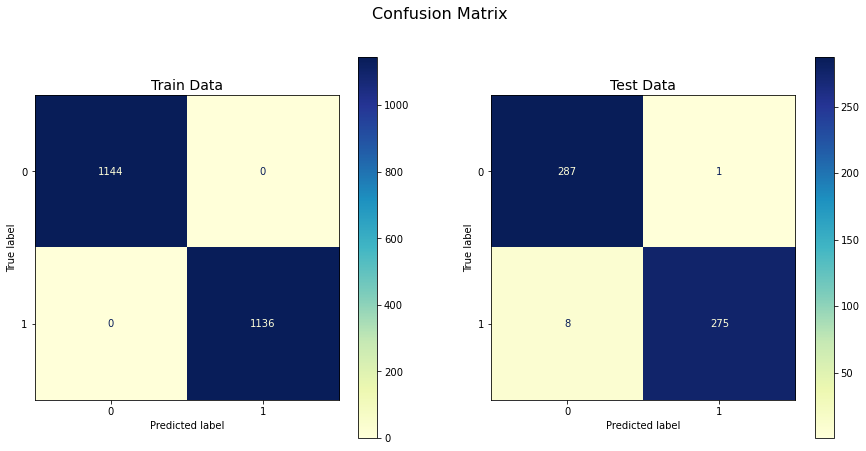

In [68]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharex=False, figsize=(15, 7))
plot_confusion_matrix(estimator=rfc, X=x_train, y_true=y_train, values_format='.5g', cmap='YlGnBu', ax=ax1)
plot_confusion_matrix(estimator=rfc, X=x_test, y_true=y_test, values_format='.5g', cmap='YlGnBu', ax=ax2)
ax1.set_title(label='Train Data', size=14)
ax2.set_title(label='Test Data', size=14)
ax1.grid(b=False)
ax2.grid(b=False)
plt.suptitle(t='Confusion Matrix', size=16)
plt.show()

**Hyperparameter Optimized Model Development & Evaluation:**

# RandomizedSearch CV :

In [71]:
from sklearn.model_selection import RandomizedSearchCV

In [72]:
param_dist = {"max_depth": range(2, 5), "min_samples_split": range(2, 15),
             "n_estimators": [100, 400, 700, 1000, 1500],
             "criterion": ['gini', 'entropy']}

In [86]:
random_search = RandomizedSearchCV(estimator = rfc, param_distributions = param_dist, n_iter = 50, random_state = 0)

In [87]:
random_search.fit(x_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1500 out of 1500 | elapsed:    2.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1500 out of 1500 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1500 out of 1500 | elapsed:    2.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1500 out of 1500 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1500 out of 1500 | elapsed:    2.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1500 out of 1500 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    2.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    2.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    2.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[

[Parallel(n_jobs=1)]: Done 700 out of 700 | elapsed:    1.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 700 out of 700 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 700 out of 700 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 700 out of 700 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 700 out of 700 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 700 out of 700 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 700 out of 700 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Us

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    2.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    2.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    2.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    3.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    3.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    3.6s finished
[Parallel(n_jo

[Parallel(n_jobs=1)]: Done 700 out of 700 | elapsed:    1.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 700 out of 700 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 700 out of 700 | elapsed:    1.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 700 out of 700 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 700 out of 700 | elapsed:    1.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 700 out of 700 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 700 out of 700 | elapsed:    1.9s finished
[Parallel(n_jobs=1)]: Us

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1500 out of 1500 | elapsed:    5.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1500 out of 1500 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1500 out of 1500 | elapsed:    5.4s finished
[Parallel(n_jobs=1

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 700 out of 700 | elapsed:    1.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 700 out of 700 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 700 out of 700 | elapsed:    1.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 700 out of 700 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 700 out of 700 | elapsed:    1.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 700 out of 700 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Us

[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Us

RandomizedSearchCV(estimator=RandomForestClassifier(random_state=0, verbose=1),
                   n_iter=50,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': range(2, 5),
                                        'min_samples_split': range(2, 15),
                                        'n_estimators': [100, 400, 700, 1000,
                                                         1500]},
                   random_state=0)

In [88]:
pred_train_rs = random_search.predict(x_train)
pred_test_rs = random_search.predict(x_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    0.0s finished


In [89]:
print('                    Training Report           ')
model_eval(y_train, pred_train_rs)

                    Training Report           
The accuracy of the Model is : 0.9767543859649123
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1144
           1       0.97      0.98      0.98      1136

    accuracy                           0.98      2280
   macro avg       0.98      0.98      0.98      2280
weighted avg       0.98      0.98      0.98      2280



In [90]:
print('                    Testing Report           ')
model_eval(y_test, pred_test_rs)

                    Testing Report           
The accuracy of the Model is : 0.9807355516637478
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       288
           1       0.99      0.98      0.98       283

    accuracy                           0.98       571
   macro avg       0.98      0.98      0.98       571
weighted avg       0.98      0.98      0.98       571



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    0.0s finished


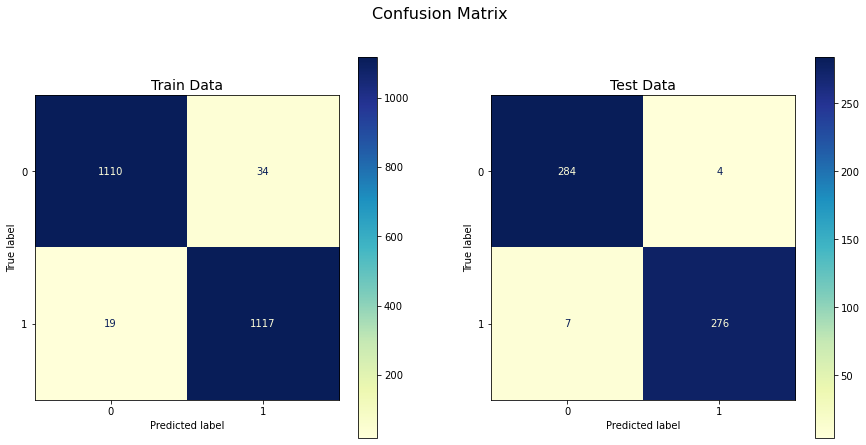

In [91]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharex=False, figsize=(15, 7))
plot_confusion_matrix(estimator=random_search, X=x_train, y_true=y_train, values_format='.5g', cmap='YlGnBu', ax=ax1)
plot_confusion_matrix(estimator=random_search, X=x_test, y_true=y_test, values_format='.5g', cmap='YlGnBu', ax=ax2)
ax1.set_title(label='Train Data', size=14)
ax2.set_title(label='Test Data', size=14)
ax1.grid(b=False)
ax2.grid(b=False)
plt.suptitle(t='Confusion Matrix', size=16)
plt.show()

In [92]:
test_df.head()

Id  meanfreq        sd    median       Q25       Q75       IQR      skew  \
0  2148  0.186833  0.027472  0.184325  0.173955  0.204731  0.030777  2.655225   
1  1124  0.188879  0.060316  0.195537  0.138072  0.242975  0.104904  1.497393   
2   170  0.150705  0.087127  0.174299  0.069666  0.226082  0.156416  2.603951   
3  3158  0.183667  0.040607  0.182534  0.156480  0.207646  0.051166  2.054138   
4  2229  0.205159  0.039543  0.210805  0.186667  0.228908  0.042241  2.099683   

        kurt    sp.ent  ...      mode  centroid   meanfun    minfun    maxfun  \
0  10.565846  0.821812  ...  0.180645  0.186833  0.172790  0.023495  0.271186   
1   5.037085  0.909425  ...  0.140386  0.188879  0.133092  0.050847  0.272727   
2  22.328899  0.969287  ...  0.050181  0.150705  0.109992  0.017260  0.266667   
3   7.483019  0.898138  ...  0.177040  0.183667  0.149237  0.018648  0.262295   
4   7.562209  0.876002  ...  0.224885  0.205159  0.154736  0.047105  0.277457   

    meandom    mindom     maxdom    dfrange   modindx  
0  0.178571  0.007812   0.226562   0.218750  0.108929  
1  0.855938  0.023438   8.718750   8.695312  0.098712  
2  1.240954  0.007812   5.562500   5.554688  0.332396  
3  0.550312  0.007812   3.421875   3.414062  0.166503  
4  1.578835  0.187500  10.804688  10.617188  0.113644  

[5 rows x 21 columns]

In [93]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 317 entries, 0 to 316
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Id        317 non-null    int64  
 1   meanfreq  317 non-null    float64
 2   sd        317 non-null    float64
 3   median    317 non-null    float64
 4   Q25       317 non-null    float64
 5   Q75       317 non-null    float64
 6   IQR       317 non-null    float64
 7   skew      317 non-null    float64
 8   kurt      317 non-null    float64
 9   sp.ent    317 non-null    float64
 10  sfm       317 non-null    float64
 11  mode      317 non-null    float64
 12  centroid  317 non-null    float64
 13  meanfun   317 non-null    float64
 14  minfun    317 non-null    float64
 15  maxfun    317 non-null    float64
 16  meandom   317 non-null    float64
 17  mindom    317 non-null    float64
 18  maxdom    317 non-null    float64
 19  dfrange   317 non-null    float64
 20  modindx   317 non-null    float6

In [94]:
test_df.isna().sum()

Id          0
meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
dtype: int64

In [95]:
test_voice = test_df.iloc[:, 1:]

In [96]:
predicted_test = random_search.predict(test_voice)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    0.0s finished


In [97]:
predicted_test

array([0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,

In [99]:
test_voice['label'] = predicted_test

In [102]:
test_voice.head()

meanfreq        sd    median       Q25       Q75       IQR      skew  \
0  0.186833  0.027472  0.184325  0.173955  0.204731  0.030777  2.655225   
1  0.188879  0.060316  0.195537  0.138072  0.242975  0.104904  1.497393   
2  0.150705  0.087127  0.174299  0.069666  0.226082  0.156416  2.603951   
3  0.183667  0.040607  0.182534  0.156480  0.207646  0.051166  2.054138   
4  0.205159  0.039543  0.210805  0.186667  0.228908  0.042241  2.099683   

        kurt    sp.ent       sfm  ...  centroid   meanfun    minfun    maxfun  \
0  10.565846  0.821812  0.159883  ...  0.186833  0.172790  0.023495  0.271186   
1   5.037085  0.909425  0.374225  ...  0.188879  0.133092  0.050847  0.272727   
2  22.328899  0.969287  0.781729  ...  0.150705  0.109992  0.017260  0.266667   
3   7.483019  0.898138  0.313925  ...  0.183667  0.149237  0.018648  0.262295   
4   7.562209  0.876002  0.271880  ...  0.205159  0.154736  0.047105  0.277457   

    meandom    mindom     maxdom    dfrange   modindx  label  
0  0.178571  0.007812   0.226562   0.218750  0.108929      0  
1  0.855938  0.023438   8.718750   8.695312  0.098712      1  
2  1.240954  0.007812   5.562500   5.554688  0.332396      1  
3  0.550312  0.007812   3.421875   3.414062  0.166503      0  
4  1.578835  0.187500  10.804688  10.617188  0.113644      0  

[5 rows x 21 columns]

In [103]:
test_voice.to_csv('Submission_voice.csv', index = False, header = False)